# Physics 261: Class 10
## 12 Feb 2024
<hr style="border-top: 1px solid purple; margin-top: 1px; border: 3px solid purple"></hr>
 The goals for today:

    1. Questions from last class
    2. Back to solving differential equations: the Euler-Cromer method for the SHO
    3. Discuss how to model projectile motion in 2d with air drag.
    
<hr style="margin-bottom: 1px; border: 3px solid purple"></hr>

In [21]:
using GLMakie

## The Euler and the Euler-Cromer method
The Euler-Cromer method is a simple modification of the Euler method in which, at each time step, one first updates the velocity and then uses the new velocity to compute the new position. 
Recall that the Euler method computes the next position by using the velocity at the beginning of the interval. We can see the difference if we implement both methods on a simple system: the harmonic oscillator.

# The Euler Method for the Simple Harmonic Oscillator
Suppose you have a mass free to slide on a frictionless surface. The mass is attached to a spring 
and the other end of the spring is attached to the wall as shown below:

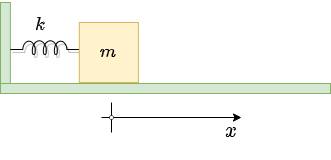


### Step 1
Write down Newton's law for the mass on the spring, and then split it into two first order equations. 

Newton's law for the mass on the spring is:
$$ -kx = m \ddot{x}$$
and broken into two first order equations, we obtain
$$
\begin{eqnarray}
dv  =& -\frac{k}{m} x dt\\
dx  =& v dt\\
\end{eqnarray}
$$

### Step 2 
Now write a function called<br>
```Julia
euler(x₀, v₀, tmax, Δt)
```
which computes and returns the:<br>
    a) position<br>
    b) velocity<br>
    c) kinetic energy, $K$<br>
    d) potential energy, $U$<br>
    e) total energy, $E=K+U$<br>
as functions of time.
The input parameters to this function are<br>
`x₀, v₀, tmax, Δt` <br>
the initial position ($x_0$), velocity ($v_0$), and the maximum simulation time (tmax), and the time step ($\Delta t$). Let's use $k/m \equiv 1.0$.


In [42]:
function KE(v; m=1)
    return 0.5*m*v^2
end
function UE(x; k=1)
    return 0.5*k*x^2
end

function euler(x₀,v₀, tmax, Δt)
    k = 1.0
    m = 1.0
    x = [x₀]
    v = [v₀]
    t = [0.0]
    while t[end]<tmax
        append!(x, x[end] + v[end]*Δt)
        append!(v, v[end] -(k/m)*x[end-1]*Δt)
        append!(t, t[end] + Δt)
    end
    K = KE.(v)
    U = UE.(x)
    E = K .+ U
    return t,x,v,K,U,E
end        

euler (generic function with 1 method)

### Step 3
Make a compound 2x2 plot containing 4 plots as follows. <br>\
    a. The upper left plot should be $x$ vs $t$,<br>
    b. Just below that (bottom left) should be $v$ vs $t$,<br>
    c. On the right side top should be  plot containing three curves: $K, U$ and $E$ vs t,<br>
    d. At the bottom right: A plot of $\frac{v}{\omega x_0}$ vs $\frac{x}{x_0}$.<br>
    
The lower right plot is called a *phase space* plot. It represents all the possible states of the system in terms of its 
position and velocity. I've had you plot not $v$ vs $x$, but a dimensionless version of each.

In [52]:
t,x,v,K,U,E = euler(1.0, 0.0, 100.0, 0.01);
xmax = maximum(x)


1.6019717682729582

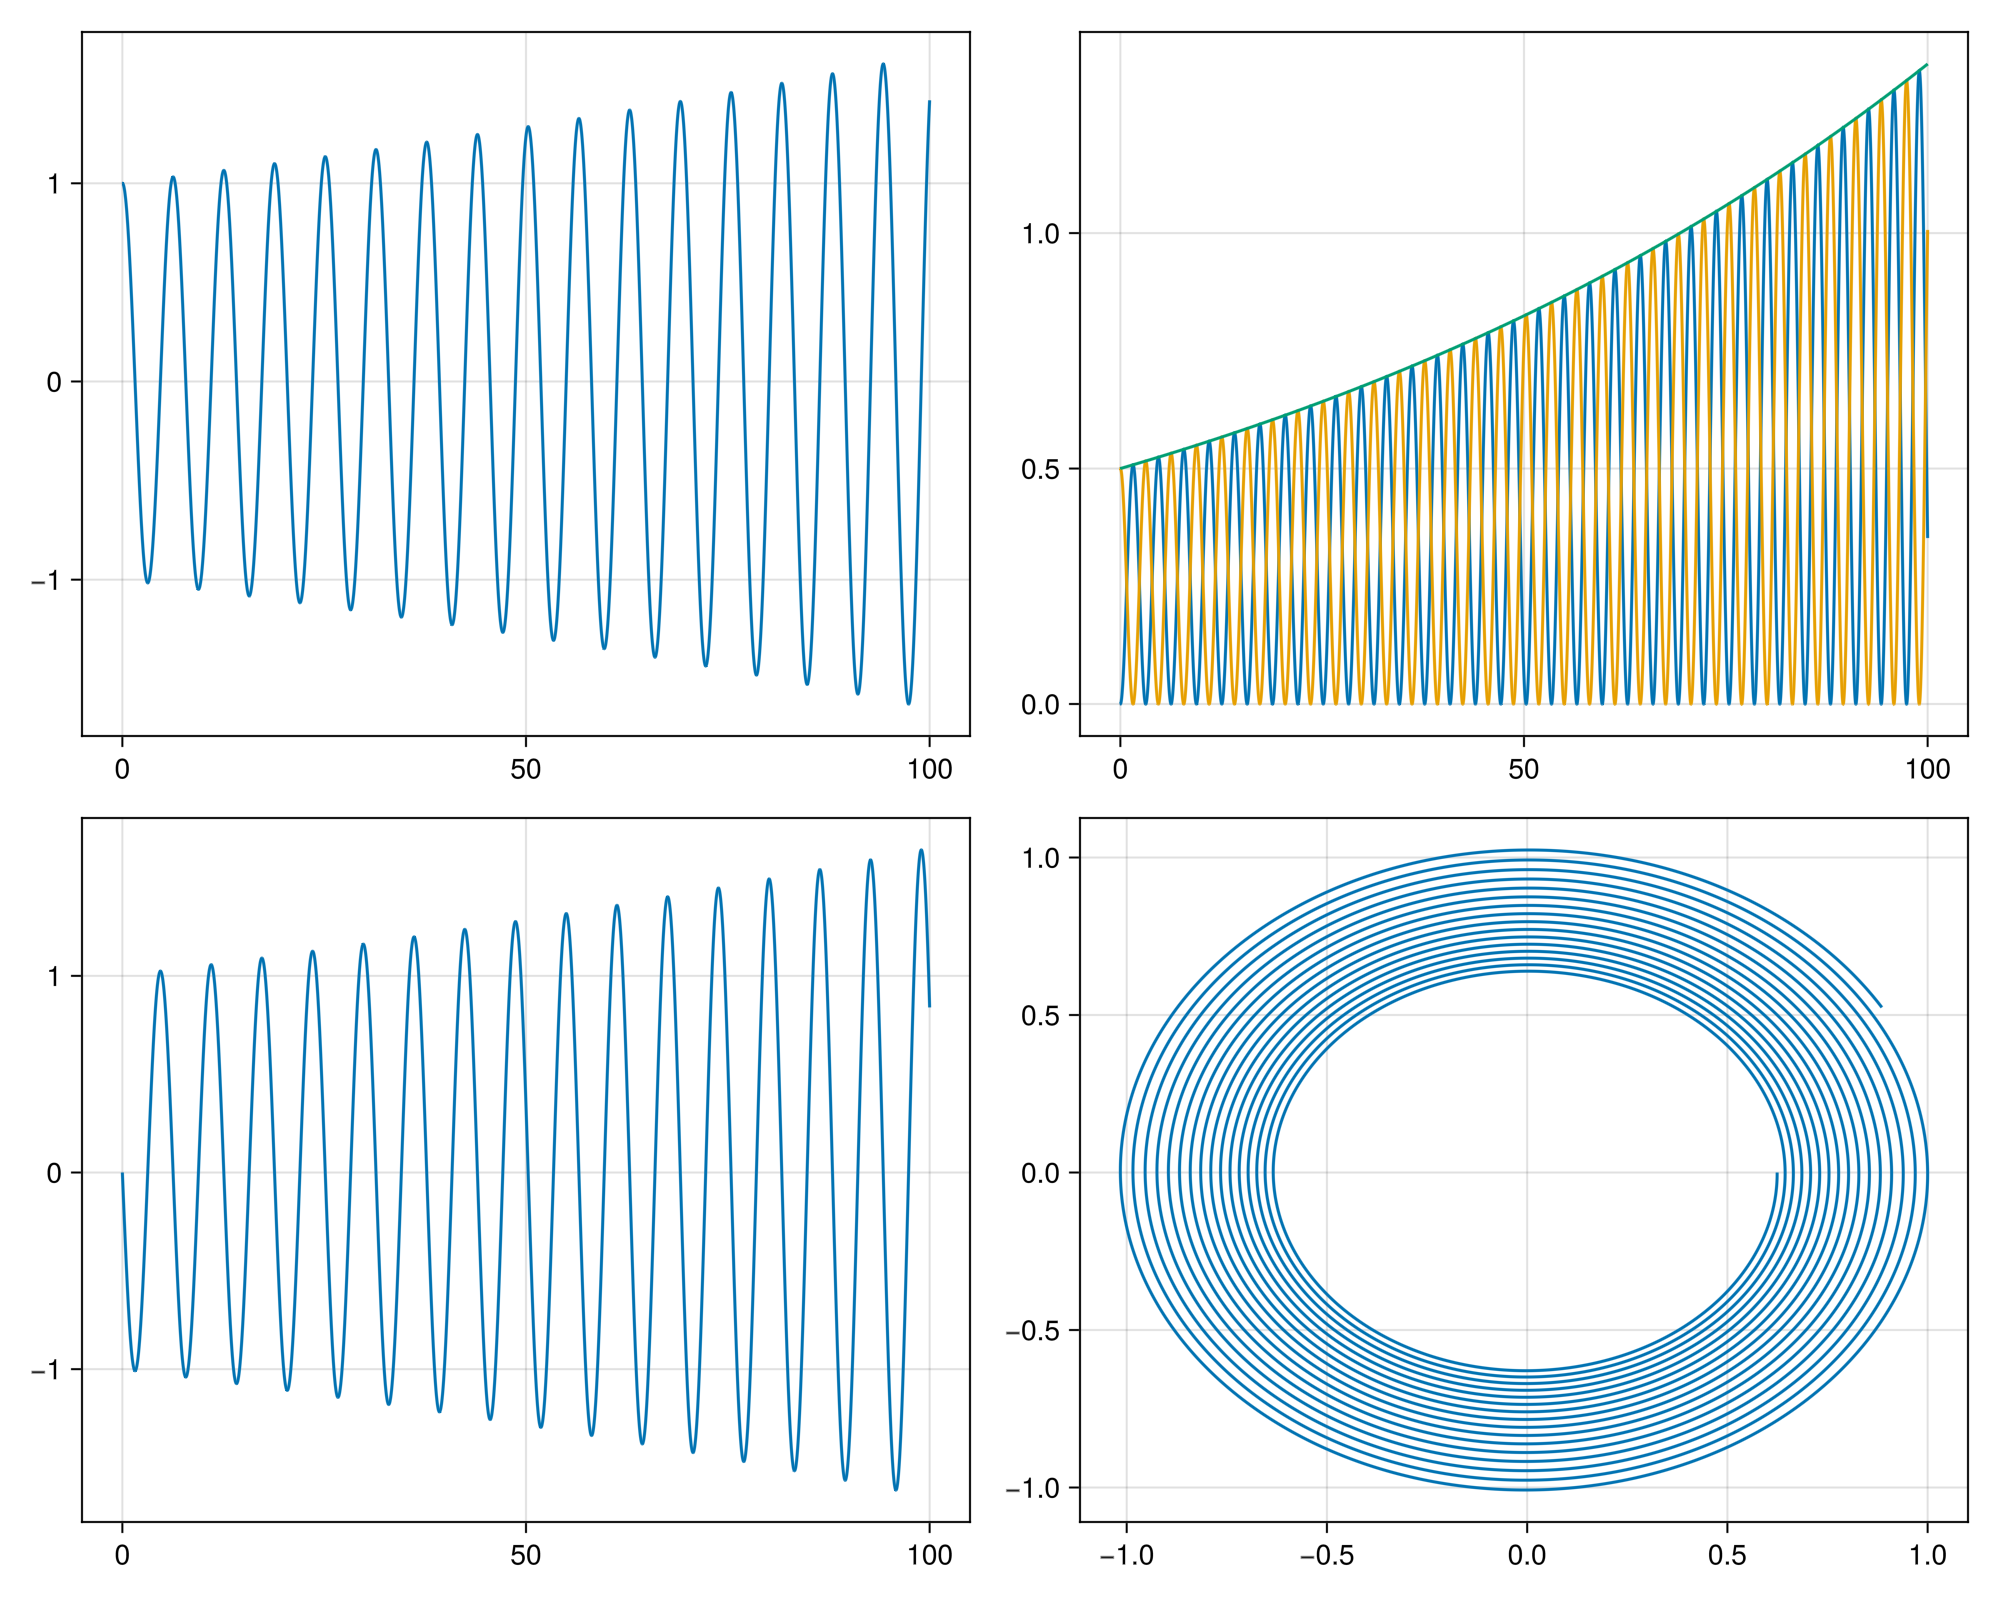

In [53]:
fig = Figure(size = (1000,800))
ax1 = Axis(fig[1,1]; )
ax2 = Axis(fig[1,2]; )
ax3 = Axis(fig[2,1]; )
ax4 = Axis(fig[2,2]; )
lines!(ax1, t, x)
lines!(ax3, t, v)
lines!(ax2, t, K)
lines!(ax2, t, U)
lines!(ax2, t, E)
lines!(ax4, x/xmax, v/xmax)
fig

### Step 4
Questions to answer based on your simulation:<br>
    a. Investigate the conservation of energy plot. Is there a value of 
        $\Delta t$ that will have the system conserve energy?<br>
    b. If you think your answer to (a) is yes, then increase the simulation time $tmax$ 
        to see if you are correct.<br>
    c. How does non-conservation of energy visually apparent in each of the other three plots?

### Step 5: The Euler-Cromer Method for the Simple Harmonic Oscillator
Now re-do parts 2-4 but using the Euler-Cromer method. In other words, write a Julia function called
```Julia
euler-cromer(x₀, v₀, tmax, Δt)
```
and then do parts 3 and 4 again. 


# Projectile motion with quadratic air resistance
If a ball of mass $m$ is launched from an initial position $(x_0, y_0)$ with speed $v_0$ at angle $\theta$ above the horizontal, 
the drag for will be always opposite to the instantaneous velocity vector, whereas the gravitational force is always directed vertically downward. 

The trajectory is shown below with the ball shown at some instant on it's path:<br>

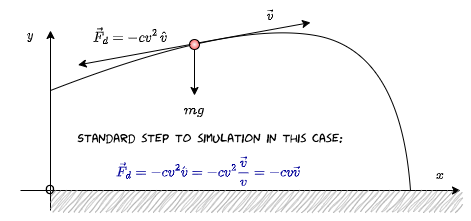

If the model the air resistance as primarily due to a quadratic drag force of the form 

$$F_d = -cv^2\vec{v}\hat{v},$$

we can simulate the motion of a projectile by first using the fact the $\hat{v} = \vec{v}/v$ to write

$$F_d = -cv\vec{v},$$

and then the acceleration of the object in the $x$ and $y$ directions is given by

$$a_x = -\frac{c}{m}v v_x\;\;\mathrm{and}\;\; a_y = -g - \frac{c}{m}v v_y,$$

where $v = \sqrt{v_x^2 + v_y^2}.$

Then, since $dv_x/dt = a_x$, we can write 

$$\Delta v_x = a_x \Delta t = -\frac{c}{m}v v_x \Delta t, $$

and 

$$\Delta v_y = a_y \Delta t =( -g - \frac{c}{m}v v_y) \Delta t, $$
We can then code this up nicely by first writing a function to compute the new velocity and positions after one time step, and then writing a loop over time. 
